In [6]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF

In [2]:
business_data = []
for line in open('business.json', 'r', encoding='utf-8'):
    business_data.append(json.loads(line))

In [3]:
review_data = []
for line in open('review.json', 'r', encoding='utf-8'):
    review_data.append(json.loads(line))

In [4]:
business_df = pd.DataFrame(business_data)

In [5]:
city = business_df[(business_df['city'] == 'Austin') & (business_df['is_open'] == 1)]

In [6]:
austin = city[['business_id', 'name', 'categories', 'stars']]
austin

,business_id,name,categories,stars
8,N3_Gs3DnX4k9SgpwJxdEfw,Lane Wells Jewelry Repair,"Shopping, Jewelry Repair, Appraisal Services, ...",5.0
24,nTIhpR7MhsALPwg_Hh14EA,DoubleTree by Hilton Hotel Austin,"Hotels, Hotels & Travel, Event Planning & Serv...",3.0
27,8XyEpVdAO0o6iVkVxkWosQ,PS Property Management Company,"Home Services, Real Estate, Property Management",4.5
37,NVfOn7TdnHbaGH97CVB_Qg,McKinley Chiropractic,"Chiropractors, Health & Medical",5.0
39,s8eTWEtW5WcnL2kUxrOVmw,Austin Regional Clinic: ARC Quarry Lake,"Diagnostic Services, Doctors, Internal Medicin...",3.5
...,...,...,...,...
160564,3hST-OFbQzCgte1XugEtug,AcuStretch,"Massage, Beauty & Spas",4.0
160566,N1rn9F8Xj8zQRfVrrQHgnw,Salute Oral & Facial Surgery,"Health & Medical, General Dentistry, Dentists",3.5
160567,TLg7py9H1W0E-F8BAn5OJQ,Austin Stained Concrete and More,"Masonry/Concrete, Home Services, Flooring",5.0
160577,m1Qw53OgkxrWu59oddVf9A,Capital Area Speech & Occupational Therapy,"Educational Services, Health & Medical, Occupa...",4.0


In [7]:
res_austin = austin[austin['categories'].str.contains('Restaurant.*')==True].reset_index()
res_austin

,index,business_id,name,categories,stars
0,41,NRPemqVb4qpWFF0Avq_6OQ,Eurasia Sushi Bar & Seafood,"Bars, Nightlife, Cocktail Bars, Seafood, Resta...",4.5
1,61,bRsDZ44CD3uhGnRY3NeQhQ,Wendy's,"Fast Food, Restaurants, Burgers",2.0
2,199,Pk4ZwXwUU50BDn5gqw_rKg,Johnny Carino's,"Italian, Salad, Pizza, Nightlife, Restaurants,...",3.0
3,253,Ieelu69Y23nbjKG3OGfwnw,McDonald's,"Restaurants, Coffee & Tea, Food, Burgers, Fast...",1.5
4,258,IFB2K3BEZ2L_Mv5AbUD26Q,Chispas,"Tex-Mex, Mexican, Tacos, Restaurants",3.5
...,...,...,...,...,...
2835,160413,Bqq7_qnQ8I1BVNcjr88Ksg,Lakeside Pizza & Grill,"Restaurants, Gluten-Free, Pizza, American (New)",3.5
2836,160465,fTgnVCCu6k_Ds25Nz73s5Q,Sushi Zushi,"Sushi Bars, Japanese, Soup, Restaurants, Asian...",3.0
2837,160480,erLD01SfdUbGWurNoJTAzw,The Vegan Yacht,"American (Traditional), Gluten-Free, Vegan, Lo...",4.5
2838,160517,io_UQS_WwonlCPCfKy3Hdw,Super Bowl,"Restaurants, Chinese",3.5


In [8]:
res_austin_id = res_austin[['business_id', 'stars']]
res_austin_id

,business_id,stars
0,NRPemqVb4qpWFF0Avq_6OQ,4.5
1,bRsDZ44CD3uhGnRY3NeQhQ,2.0
2,Pk4ZwXwUU50BDn5gqw_rKg,3.0
3,Ieelu69Y23nbjKG3OGfwnw,1.5
4,IFB2K3BEZ2L_Mv5AbUD26Q,3.5
...,...,...
2835,Bqq7_qnQ8I1BVNcjr88Ksg,3.5
2836,fTgnVCCu6k_Ds25Nz73s5Q,3.0
2837,erLD01SfdUbGWurNoJTAzw,4.5
2838,io_UQS_WwonlCPCfKy3Hdw,3.5


In [9]:
review_df = pd.DataFrame(review_data)

In [10]:
review_austin = pd.merge(review_df,res_austin_id,on="business_id")

In [11]:
review_austin

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,stars_y
0,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,4.0,0,0,0,I think their rice dishes are way better than ...,2017-05-26 03:05:46,4.0
1,xxUbWSkZtPHrPFT_RhW68A,ZuB2N9UOIooj9nPtI3Re5g,mOnesB4IF9j6-ZmHoOHOig,2.0,0,0,0,I've given this place a couple of chances and ...,2014-01-17 00:55:26,4.0
2,48wQst-NfdRPpu32cUEsaA,AQUdnD35RBuCXNx0KxE5wA,mOnesB4IF9j6-ZmHoOHOig,4.0,0,0,0,Definitely one of my favorite places for vietn...,2015-06-21 00:30:24,4.0
3,0-k1eqpn_i2FnyBBwtFSYw,IYRlxx4G8fkkc6x_gk4sPg,mOnesB4IF9j6-ZmHoOHOig,5.0,0,0,0,My favorite Vietnamese restaurant in town. I l...,2017-09-08 23:20:38,4.0
4,JF4NXGCyOgkUIQzRlQRuuw,ZYs9y2Hk_C55Ynr40TGmUA,mOnesB4IF9j6-ZmHoOHOig,4.0,0,0,0,"Good food, good price, and good service. You ...",2010-07-07 16:27:26,4.0
...,...,...,...,...,...,...,...,...,...,...
612271,az-zmTRCxh9LQxub7aONUQ,G9vxPaZgba_SddJGNcPhaA,LhFdkeOzbxPi6NeGS-1K1Q,4.0,0,0,1,Fun little spot at the Mueller HEB! It's fun t...,2020-11-30 22:29:41,4.5
612272,Jin8E1kHU2XUR8tcHSR_Zw,2pAvWxTk8a7AczFh66n7lg,LhFdkeOzbxPi6NeGS-1K1Q,5.0,0,1,0,I do my grocery shopping at Meuller HEB and I ...,2020-12-01 00:53:35,4.5
612273,vKO8JVCa64PoUXLjLZlPWA,JuHJPUXICe7DgUFSZiwbNA,LhFdkeOzbxPi6NeGS-1K1Q,4.0,0,0,1,Not your average fried rice but most definitel...,2020-12-19 23:25:15,4.5
612274,_yqmtg9XS0sUSsEYt7PKig,MoB1Ig-3FaC4u1o8gm2rMg,LhFdkeOzbxPi6NeGS-1K1Q,5.0,7,2,5,I have been anxious to visit the H-E-B Mueller...,2020-08-28 22:53:56,4.5


In [44]:
df_badreviews = review_austin.loc[review_austin.stars_x >= 4]
df_badreviews.shape

(430833, 10)

In [45]:
bad_texts = []
for review in df_badreviews.text:
    bad_texts.append(review)

In [46]:
bad_texts[:3]

["I think their rice dishes are way better than their Pho's. Also I really like their sandwiches and spring rolls. I took a friend who haven't had viennese food ever. He absolutely love it.",
 'Definitely one of my favorite places for vietnamese grub! Very authentic and although they hardly speak english, the people here are really nice. Will always recommend others to try it.',
 "My favorite Vietnamese restaurant in town. I love the pho and the vermicelli bowls. I've tried many other places and none compare."]

In [47]:
def tokenize(texts):
    tokenizer = nltk.RegexpTokenizer(r'\w+')

    texts_tokens = []
    for i, val in enumerate(texts):
        text_tokens = tokenizer.tokenize(val.lower())

        for i in range(len(text_tokens) - 1, -1, -1):
            if len(text_tokens[i]) < 4:
                del(text_tokens[i])

        texts_tokens.append(text_tokens)
        
    return texts_tokens

In [48]:
texts_tokens = tokenize(bad_texts)

In [49]:
len(texts_tokens)

430833

In [35]:
def removeSW(texts_tokens):
    stopWords = set(stopwords.words('english'))
    texts_filtered = []

    for i, val in enumerate(texts_tokens):
        text_filtered = []
        for w in val:
            if w not in stopWords:
                text_filtered.append(w)
        texts_filtered.append(text_filtered)
        
    return texts_filtered

In [50]:
texts_filtered = removeSW(texts_tokens)

In [51]:
len(texts_filtered)

430833

In [38]:
def lemma(texts_filtered):
    wordnet_lemmatizer = WordNetLemmatizer()
    texts_lem = []

    for i, val in enumerate(texts_filtered):
        text_lem = []
        for word in val:
            text_lem.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        texts_lem.append(text_lem)
    
    return texts_lem

In [52]:
texts_lem = lemma(texts_filtered)

In [53]:
bad_texts_string = []
for text in texts_lem:
    string = ' '
    string = string.join(text)
    bad_texts_string.append(string)

In [54]:
bad_texts_string[:3]

['think rice dish better also really like sandwich spring roll take friend viennese food ever absolutely love',
 'definitely favorite place vietnamese grub authentic although hardly speak english people really nice always recommend others',
 'favorite vietnamese restaurant town love vermicelli bowl try many place none compare']

In [55]:
f = open('good_texts_string.txt', 'w', encoding='utf-8')
f.write(','.join(bad_texts_string))
f.close()

In [1]:
text_string = []
with open('mid_texts_string.txt', 'r', encoding='utf-8') as f:
    lines = f.read()
    line = lines.split(',')
    text_string.append(line)


In [2]:
text_string = text_string[0]


In [3]:
len(text_string)

69832

In [4]:
def plot_top_words(model, feature_names, n_top_words, title):
    #Modified from SKlearn
    fig, axes = plt.subplots(2, 5, figsize=(15, 7))
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 15})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=15)
        ax.tick_params(bottom=False)
        ax.set(xticklabels=[])

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [7]:
vectorizer = CountVectorizer(max_df=0.90, min_df=5)
X = vectorizer.fit_transform(text_string)
feature_names =  vectorizer.get_feature_names()

X.toarray().shape

(69832, 14040)

In [8]:
n_topics = 10

lda = LatentDirichletAllocation(
        n_components=n_topics,
        max_iter=12
)

lda.fit_transform(X)

array([[2.00037181e-03, 2.00048494e-03, 2.00051407e-03, ...,
        2.00047978e-03, 2.00040951e-03, 7.75992474e-01],
       [3.33417762e-03, 3.33415704e-03, 3.33399281e-03, ...,
        3.33425554e-03, 3.33419879e-03, 3.58790073e-01],
       [7.14452187e-03, 7.14511609e-03, 1.20351162e-01, ...,
        8.22491733e-01, 7.14422541e-03, 7.14486564e-03],
       ...,
       [6.66805535e-04, 1.60684733e-01, 1.31264675e-01, ...,
        6.66805577e-04, 1.89884148e-02, 2.24301360e-01],
       [1.66697859e-02, 1.66711419e-02, 5.45457878e-01, ...,
        1.66708847e-02, 3.21176038e-01, 1.66695512e-02],
       [3.84701553e-03, 3.84728870e-03, 4.83372582e-01, ...,
        3.84683369e-03, 3.84756107e-03, 1.66663818e-01]])

In [9]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, feature_names, no_top_words)

Topic 0:
tacos good taco salsa chip like place food mexican queso
Topic 1:
food place good drink great like service really time come
Topic 2:
food order time wait service come take table good minutes
Topic 3:
good like order dish steak come menu would cheese great
Topic 4:
chicken good order food like soup rice sandwich fry dish
Topic 5:
like coffee order place time make work know go people
Topic 6:
pizza good food place like sauce wing chicken order really
Topic 7:
burger fry good food place burgers like price great menu
Topic 8:
good brisket side chicken like place order meat sausage egg
Topic 9:
place like good sushi roll food ramen price really taste


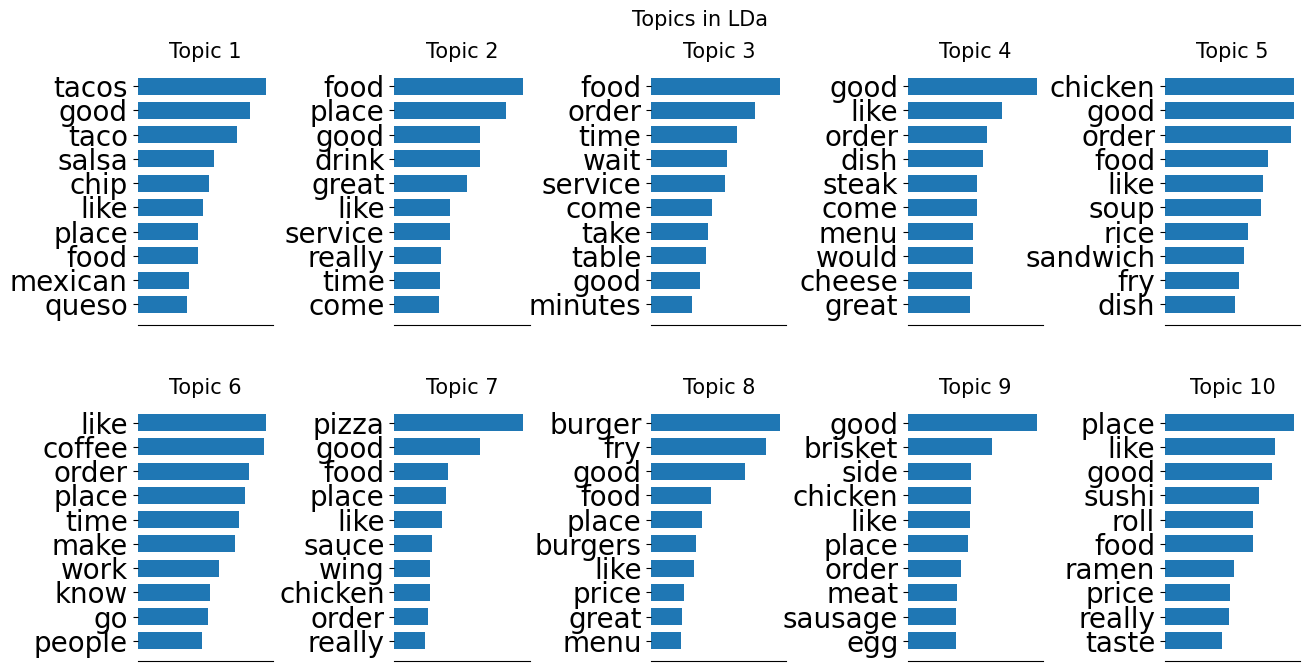

In [10]:
plot_top_words(lda, feature_names, no_top_words,'Topics in LDa')

In [11]:
nmf = NMF(n_components=n_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd')
nmf.fit_transform(X)

D:\software\code-project\anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


array([[0.00786668, 0.03894416, 0.0488788 , ..., 0.        , 0.        ,
        0.        ],
       [0.01002208, 0.00125663, 0.        , ..., 0.        , 0.        ,
        0.00391457],
       [0.        , 0.04578681, 0.03973781, ..., 0.        , 0.        ,
        0.00057468],
       ...,
       [0.00250082, 0.08511799, 0.08443722, ..., 0.11801681, 0.03108422,
        0.12033611],
       [0.00647065, 0.0408006 , 0.        , ..., 0.        , 0.00093331,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.09166228, 0.        ,
        0.        ]])

In [12]:
no_top_words = 10
display_topics(nmf, feature_names, no_top_words)

Topic 0:
wait table drink seat would take go make minutes service
Topic 1:
good pretty service really nice though overall price salsa chip
Topic 2:
food service great price restaurant star better fast quality atmosphere
Topic 3:
order take minutes say ask menu pick tell call give
Topic 4:
dish would sauce flavor make really taste think menu little
Topic 5:
place austin great really pretty think want nice give better
Topic 6:
like really taste feel look seem know want think something
Topic 7:
time first go last always next service love every give
Topic 8:
fry chicken burger burgers sauce side rice cheese taste sandwich
Topic 9:
come back would pretty take service waitress server check say


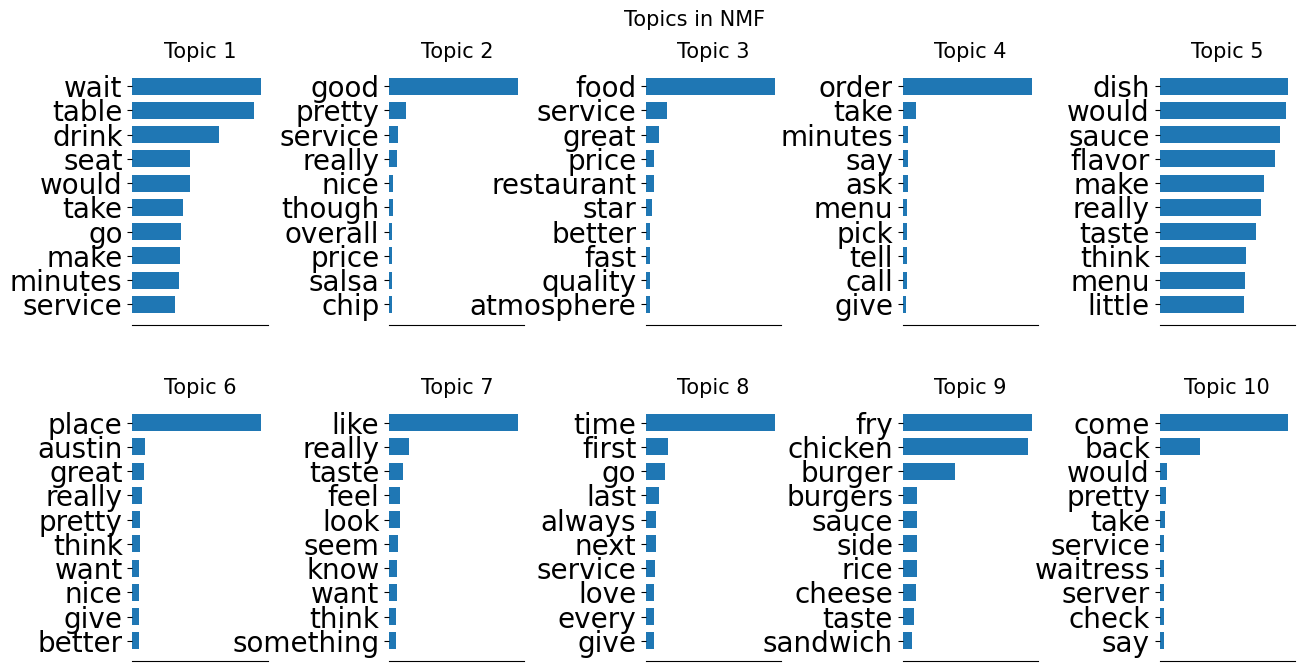

In [13]:
plot_top_words(nmf, feature_names, no_top_words,'Topics in NMF')


In [14]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, 
    min_df=5,  
    stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(text_string)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [15]:
lda = LatentDirichletAllocation(
        n_components=n_topics,
        max_iter=12
)

lda.fit_transform(tfidf)

array([[0.01481076, 0.01481491, 0.01481527, ..., 0.01481437, 0.18698241,
        0.01481514],
       [0.01883924, 0.01884372, 0.16679596, ..., 0.01884419, 0.68245611,
        0.01884446],
       [0.0260386 , 0.02604432, 0.02604679, ..., 0.0260454 , 0.02604717,
        0.02604374],
       ...,
       [0.00915377, 0.42632518, 0.00915539, ..., 0.009156  , 0.50042524,
        0.00915468],
       [0.03220718, 0.0322186 , 0.03221259, ..., 0.03221913, 0.03222408,
        0.03221068],
       [0.0186456 , 0.01865236, 0.01864978, ..., 0.01865129, 0.01865303,
        0.01865123]])

In [16]:
no_top_words = 10
display_topics(lda, tfidf_feature_names, no_top_words)

Topic 0:
bagel biscuits crepe gluten pancakes bagels gravy egg breakfast free
Topic 1:
good food like place order dish come menu really great
Topic 2:
tacos taco breakfast good indian food tortillas place like salsa
Topic 3:
place coffee food good great ramen nice drink like park
Topic 4:
food order time wait good service place come table like
Topic 5:
fry burger chicken good food like place order sauce burgers
Topic 6:
sushi good roll order food place like fish come price
Topic 7:
food good salsa chip service place great drink mexican queso
Topic 8:
soup good chinese food like place dish noodles chicken rice
Topic 9:
pizza crust slice good pizzas pepperoni toppings cheese like place


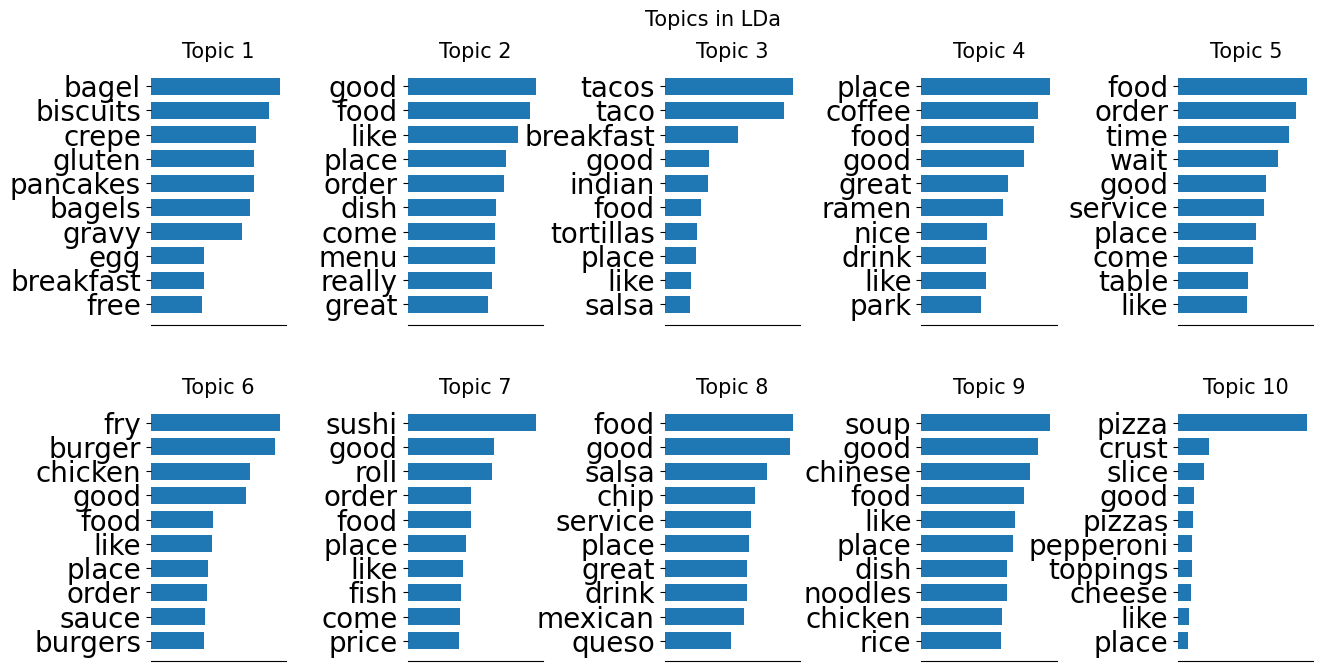

In [17]:
plot_top_words(lda, tfidf_feature_names, no_top_words,'Topics in LDa')

In [18]:
nmf = NMF(n_components=n_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd')
nmf.fit_transform(tfidf)

D:\software\code-project\anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


array([[0.01017615, 0.        , 0.        , ..., 0.00151994, 0.        ,
        0.0043401 ],
       [0.01101461, 0.00068635, 0.00019608, ..., 0.00300068, 0.01405314,
        0.        ],
       [0.00974798, 0.        , 0.        , ..., 0.        , 0.00111662,
        0.        ],
       ...,
       [0.01090725, 0.00976444, 0.        , ..., 0.00701637, 0.00574031,
        0.        ],
       [0.00214953, 0.00090168, 0.        , ..., 0.00217867, 0.        ,
        0.        ],
       [0.00716561, 0.00505043, 0.00029824, ..., 0.00170512, 0.        ,
        0.00495847]])

In [19]:
display_topics(nmf, feature_names, no_top_words)

Topic 0:
phoenix legal rabe teenage luncheon national vida libations collapse mazing
Topic 1:
chekos fresher reseat offices safest disappointments sonic sneakers taters firmly
Topic 2:
phil crop siew chateaubriand glaringly philadelphia past thrust offices safest
Topic 3:
suprisingly supremely bran rosie chilango proud ticket bathrooms tick glaringly
Topic 4:
offices verge text superior microbrews collapse floater link dozen sausage
Topic 5:
bulgogi fresher bulk seamless glaringly lemony chateaubriand papardelle tartines unruly
Topic 6:
glaringly floater scott pot potentially daytime austiny beneficial phoenix fairness
Topic 7:
brewery require pleather sage martin safest glaringly beansprouts pointedly roomy
Topic 8:
subsequent review hair honeydew fiends towns potentially rosemary reseat southern
Topic 9:
gowalla dozen scott assortment floater use hair honeydew beat phoenix


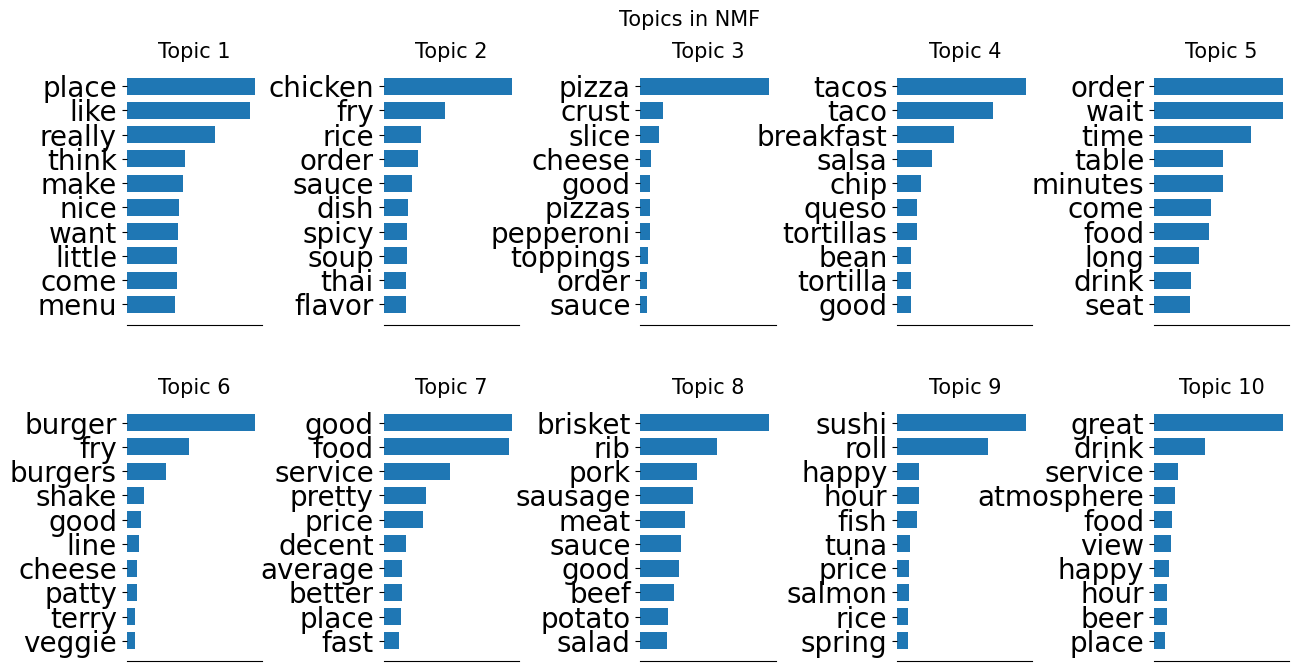

In [20]:
plot_top_words(nmf, tfidf_feature_names, no_top_words,'Topics in NMF')